# Northwind Traders Data Analysis

Author: Najam Ul Hasan

08.04.2023

## Acknowledgement

For this project, the author would like to thank Maven Analytics for providing the data for analysis.

## Overview

The report performs a simple, straightforward analysis of a fictional trading firm 'Northwind Traders' with the provided data. This analyzes for existing sales trends, as well as briefly covers the questions:

- What is the best-selling product?
- What is the least-selling product?
- Who are the key customers?
- Are the shipping costs consistent throughout?

# Analysis

### Identifying if there exists a Sales Trend

We start our analysis by importing the required packages, and the datasets which are going to be utilized for this report:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#loading the data
orders_df = pd.read_csv('C:/Users/Najamul Hasan/Desktop/NewProject/Northwind Traders/orders.csv')
order_details_df = pd.read_csv('C:/Users/Najamul Hasan/Desktop/NewProject/Northwind Traders/order_details.csv')
customers_df = pd.read_csv('C:/Users/Najamul Hasan/Desktop/NewProject/Northwind Traders/customers.csv', encoding = 'latin-1')
products_df = pd.read_csv('C:/Users/Najamul Hasan/Desktop/NewProject/Northwind Traders/products.csv', encoding = 'unicode_escape')
categories_df = pd.read_csv('C:/Users/Najamul Hasan/Desktop/NewProject/Northwind Traders/categories.csv')
employees_df = pd.read_csv('C:/Users/Najamul Hasan/Desktop/NewProject/Northwind Traders/employees.csv')
shippers_df = pd.read_csv('C:/Users/Najamul Hasan/Desktop/NewProject/Northwind Traders/shippers.csv')

After importing the data, it is necessary to convert the dates into the appropriate time-series form, and grouping them.

In [4]:
orders_df['orderDate'] = pd.to_datetime(orders_df['orderDate'])
orders_df['shippedDate'] = pd.to_datetime(orders_df['shippedDate'])

orders_df['year_month'] = orders_df['orderDate'].dt.to_period('M')

sales_trend = orders_df.groupby('year_month')['freight'].sum()


Now, a plot can be generated to visualize a sales trend.

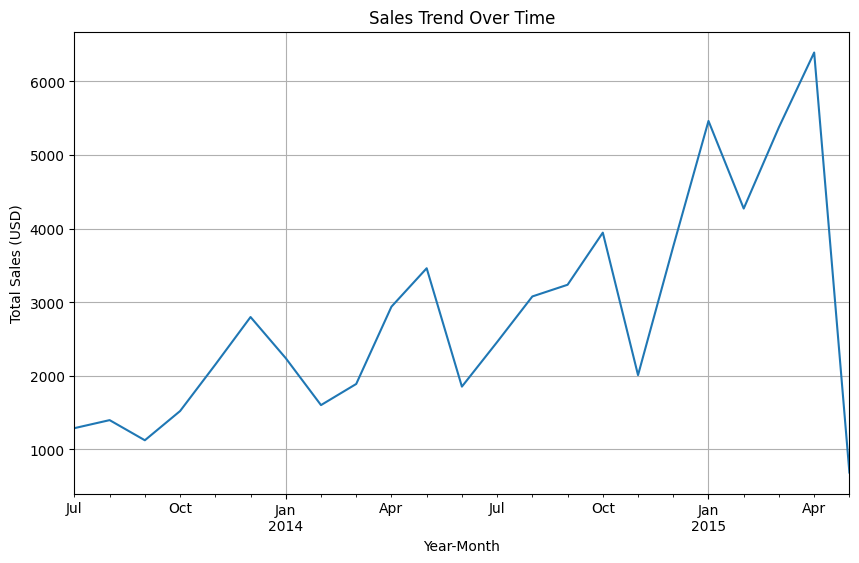

In [5]:
plt.figure(figsize=(10,6))
sales_trend.plot(kind='line')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales (USD)')
plt.title('Sales Trend Over Time')
plt.grid(True)
plt.show()

From the above graph, it can be observed that for the period July 2013 - May 2015, the sales have seen a generally increasing trend up until the very last month. However, we can observe a seasonal trend too with the data: observe that for the year 2013, the sales have experienced a boost in December, in May and October for the year 2014, and January and April for the year 2015, followed by a sharp drop with each peak the following month. May 2015 recorded the least sales, but it can be inferred that the data for the month may be insufficient to conclude that, because of such a low volume for the month. Overall, a generally-increasing, seasonal trend can be seen with the sales at Northwind Traders.

### Identifying the best-selling and the least-selling products

The data can be further used in order to identify the most-preferred product from the customers, and conversely, the least-preferred product. This can be assessed using their sales.

In [6]:
orders_merged_df = pd.merge(orders_df, order_details_df, on = 'orderID', how = 'inner')

product_sales = orders_merged_df.groupby('productID')['quantity'].sum()

In [7]:
#best-selling
best_selling_product = product_sales.idxmax()
best_selling_quantity = product_sales.max()

In [9]:
print(f"Best-Selling Product: {best_selling_product}. Quantity Sold: {best_selling_quantity}")

Best-Selling Product: 60. Quantity Sold: 1577


Here, we observe that the product number 60, "Camembert Pierrot" has sold the most throughout the time period, with 1577 recorded sales.
The converse follows the same approach.

In [ ]:
#least-selling
least_selling_product = product_sales.idxmin()
least_selling_quantity = product_sales.min()

In [11]:
print(f"Least-Selling Product: {least_selling_product}. Quantity Sold: {least_selling_quantity}")

Least-Selling Product: 9. Quantity Sold: 95


The product that received the least orders for sales is product number 9, "Mishi Kobe Niku", with only 95 instances reported as sold.

### Identifying Key Customers

Now that we have the preferred (and otherwise) products shown, the data can also be used to identify key customers. This is particularly useful to launch Loyalty programs, where such key customers are then notified of, and even provided, small exclusive discounts!

In [12]:
#grouping by customerID and then summing the total amount spent by each customer
customer_spending = orders_merged_df.groupby('customerID')['freight'].sum()

#top 25 key customers
key_customers = customer_spending.nlargest(25)

print("Key Customers:")
print(key_customers)

Key Customers:
customerID
SAVEA    26533.85
ERNSH    24536.92
QUICK    20861.13
HUNGO     7214.49
QUEEN     6966.44
RATTC     6775.19
FOLKO     5310.94
FRANK     4931.31
BERGS     4835.18
MEREP     4121.11
WHITC     4017.32
BONAP     3952.65
HILAA     3417.38
PICCO     3194.52
SUPRD     3185.51
KOENE     3033.25
RICSU     2972.58
LEHMS     2938.11
VAFFE     2786.31
SEVES     2757.50
OTTIK     2672.69
WARTH     2611.93
OLDWO     2551.78
FOLIG     2500.45
GREAL     2455.43
Name: freight, dtype: float64


The following shows the data of 25 key customers, identified by the total amount they have spent to buy products from Northwind Traders. From the data, it can be seen that the first three have spent over $20,000; after that, the customers have been observed to spend less than $10,000 overall, with a sharp decline at just above $7,200. The difference between the cumulative spending amount of customers after it then is seen to decrease. The top three customers can be identified as Save-a-Lot Markets, Ernst Handel, and QUICK-Stop, respectively.

### Consistent Shipping Costs

As a trading firm, it is important to maintain shipping costs while minimizing any effects caused by exogenous factors. Assuming no exogeneity with the shipping process, we can gauge if the shipping costs have remained consistent while utilizing the service from three shipping firms.

In [13]:
#grouping by shipperID and calculating average shipping costs
avg_shipping_cost = orders_df.groupby('shipperID')['freight'].mean()

print("Average Shipping Cost by Shipper:")
print(avg_shipping_cost)

Average Shipping Cost by Shipper:
shipperID
1    65.001325
2    86.640644
3    80.441216
Name: freight, dtype: float64


From the calculations, it is clear the shipping costs are not entirely consistent. The shipper "Speedy Express" (ID: 1) is shown to have the least shipping costs, with "Federal Shipping" (ID: 3) showing a significant jump. "United Express" is seen to be the costliest option to ship goods to the customers, therefore at a business standpoint, it is more profitable to use Speedy Express to transport the orders. 

# Conclusion

Thank you for your time and interest reading my report!

This is my first Python project that I am sharing publicly, as a part of learning experience. I would absolutely love to hear feedback and constructive criticism.